In [1]:
import geopandas as gpd
# read the csv file
dbFlood_Extent=gpd.read_file("D:\Projects\Geopatial\Data\Flood_Extent_20141124.shp")


In [2]:
dbFlood_Extent.head()

,geometry
0,"POLYGON ((570197.440 610657.835, 571527.899 61..."
1,"POLYGON ((571527.899 610658.559, 572318.172 61..."
2,"POLYGON ((572318.172 610658.989, 572658.290 61..."
3,"POLYGON ((577139.847 610661.612, 577559.994 61..."
4,"POLYGON ((577559.994 610661.841, 577720.050 61..."


In [3]:
dbMax=gpd.read_file("D:\Projects\Geopatial\Data\Max_flood_EventDec2014.shp")


In [4]:
dbMax.head()

,geometry
0,"POLYGON ((559804.729 609111.660, 559804.647 60..."
1,"POLYGON ((610136.400 503549.971, 609546.182 50..."
2,"POLYGON ((618049.357 503523.738, 617979.331 50..."
3,"POLYGON ((619946.730 510487.260, 619946.735 51..."
4,"POLYGON ((619953.602 516959.695, 619953.612 51..."


<Axes: >

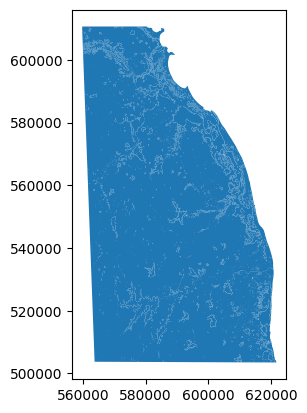

In [5]:
dbMax.plot()

<Axes: >

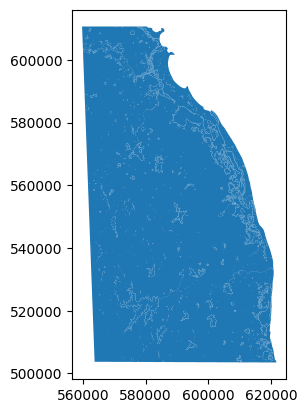

In [6]:
dbFlood_Extent.plot()

In [7]:
dbExtend20141218=gpd.read_file("D:\Projects\Geopatial\Data\Flood_Extent_20141218.shp")

<Axes: >

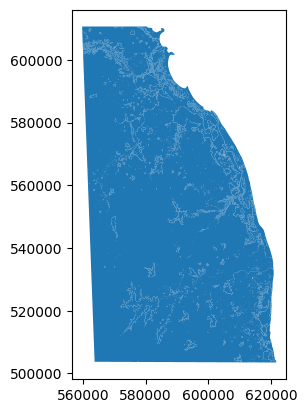

In [8]:
dbExtend20141218.plot()

In [9]:
# # Reading the flooddata dataset
# sl_flood1 = pd.read_csv('D:\Projects\Geopatial\Data\nethredcross\srilankafloodsad3.csv') 
# # Displaying the dataset into tabular format
# sl_flood1.head(100)

In [10]:
# Importing all required libraries

import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [11]:
# Reading the SL weather dataset for the analysis
sl_weatherdata = pd.read_csv('D:\Projects\Geopatial\Data\SriLanka_Weather_Dataset.csv') 
# Displaying the dataset into tabular format
sl_weatherdata.head(100)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2010-04-06,65,31.4,24.7,27.3,38.9,30.3,33.5,2010-04-06T00:36,2010-04-06T12:49,...,10.0,9.4,23.4,131,4.41,7.0,79.899994,16.0,Sri Lanka,Colombo
96,2010-04-07,63,31.1,25.2,27.3,38.2,30.8,33.3,2010-04-07T00:36,2010-04-07T12:49,...,11.0,9.4,23.8,153,4.15,7.0,79.899994,16.0,Sri Lanka,Colombo
97,2010-04-08,51,31.0,25.7,28.1,37.4,31.3,34.0,2010-04-08T00:35,2010-04-08T12:49,...,4.0,8.0,28.1,195,3.51,7.0,79.899994,16.0,Sri Lanka,Colombo
98,2010-04-09,63,30.8,25.4,27.5,40.7,31.2,33.9,2010-04-09T00:35,2010-04-09T12:49,...,7.0,7.4,23.8,93,4.09,7.0,79.899994,16.0,Sri Lanka,Colombo


In [12]:
# Exploratory Data Analysis

In [13]:
# Printing row and columns
sl_weatherdata.shape 

(147480, 24)

In [14]:
# # Checking for null values

# flooddata.isnull().sum()

In [15]:
# Generating descriptive statistics

sl_weatherdata.describe()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.0,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,46.647776,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,18.483513,5.975637,5.975637,0.0,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333
std,21.623876,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,4.214270,10.215294,10.215294,0.0,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824
min,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,1.230000,0.000000,0.000000,0.0,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000
25%,51.000000,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,16.220000,0.400000,0.400000,0.0,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000
50%,53.000000,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,19.130000,2.600000,2.600000,0.0,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000
75%,61.000000,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,21.510000,7.500000,7.500000,0.0,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000
max,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,28.980000,338.800000,338.800000,0.0,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000


In [16]:
# Information about data

sl_weatherdata.info

<bound method DataFrame.info of               time  weathercode  temperature_2m_max  temperature_2m_min  \
0       2010-01-01            2                30.0                22.7   
1       2010-01-02           51                29.9                23.5   
2       2010-01-03           51                29.5                23.2   
3       2010-01-04            2                28.9                21.9   
4       2010-01-05            1                28.1                21.3   
...            ...          ...                 ...                 ...   
147475  2023-06-13           63                29.2                24.7   
147476  2023-06-14           61                29.1                25.4   
147477  2023-06-15           51                29.8                25.5   
147478  2023-06-16           53                30.5                25.5   
147479  2023-06-17           51                29.6                25.2   

        temperature_2m_mean  apparent_temperature_max  \
0         

In [17]:

# cols = ['time' ,  'elevation', 'city', 'apparent_temperature_mean', 
#         'shortwave_radiation_sum','precipitation_sum','rain_sum', 'precipitation_hours' ]
# a=sl_weatherdata[cols].values.tolist()
# a

In [18]:
import numpy as np  
import pandas as pd  
import folium
from sklearn.linear_model import LinearRegression
 

# Setup plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [19]:
#Extracting the SriLanka_Weather_Dataset data for the analysis
sl_weatherdata = pd.read_csv('D:\Projects\Geopatial\Data\SriLanka_Weather_Dataset.csv')
sl_weatherdata.head(5)
cities = pd.DataFrame({'Cities' : sl_weatherdata.city.unique()})
latitudes = []
longitudes = []
# cities.head()
for i in range(cities['Cities'].size):
    lat = sl_weatherdata.loc[sl_weatherdata['city'] == cities['Cities'].iloc[i]]['latitude'].iloc[0]
    long = sl_weatherdata.loc[sl_weatherdata['city'] == cities['Cities'].iloc[i]]['longitude'].iloc[0]
    latitudes.append(lat)
    longitudes.append(long)
cities['latitude'] = latitudes; cities['longitude'] = longitudes

In [20]:
# Create map of Sri Lanka with the collected Weather data
map_1 = folium.Map(width = 600, height = 400, location=[7.877083,80.697917], tiles='cartodbpositronnolabels', zoom_start=7, zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

    
for idx, row in cities.iterrows():
    folium.Circle(location = [row['latitude'], row['longitude']], 
                  radius = 2000,
                 ).add_child(folium.Popup(row['Cities'] )).add_to(map_1)
# Display the map
map_1

In [21]:
cities = sl_weatherdata.city.unique()
#collecting data for Jaffna
weather_sl_jaffna = sl_weatherdata[sl_weatherdata['city'] == 'Jaffna']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_jaffna.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_jaffna = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
weather_jaffna.set_index('time', drop = True, inplace = True)
weather_jaffna.head()

,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,city
time,,,,,,,,,,,,
2010-01-01,2,26.6,27.2,16.89,0.0,0.0,0.0,27.1,39.6,45,4.86,Jaffna
2010-01-02,51,25.9,27.3,16.48,1.0,1.0,7.0,27.0,38.5,42,4.03,Jaffna
2010-01-03,51,25.4,26.4,18.55,0.2,0.2,2.0,27.8,39.2,41,4.33,Jaffna
2010-01-04,3,25.3,25.9,18.48,0.0,0.0,0.0,21.6,31.7,29,4.76,Jaffna
2010-01-05,2,25.2,25.7,21.39,0.0,0.0,0.0,23.7,33.1,25,5.29,Jaffna


Text(0.5, 1.0, 'Monthly Rainfall from 2010 - 2020 in Sri Lanka')

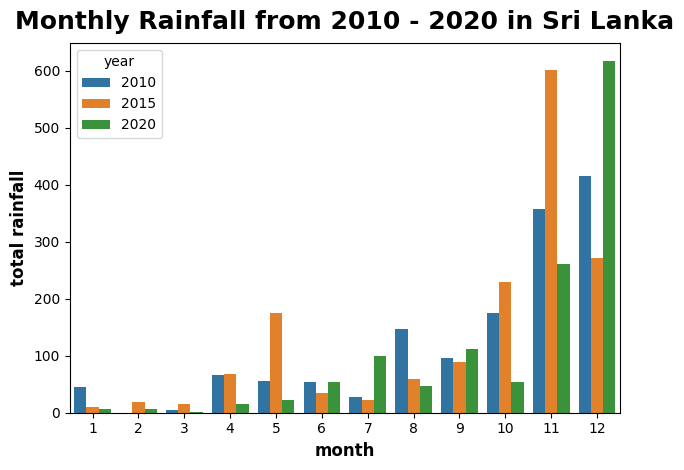

In [22]:
# months = weather_jaffna.month.unique()
annual_rainfall = weather_jaffna.groupby([weather_jaffna.index.year, weather_jaffna.index.month]).rain_sum.sum()
annual_rainfall.index.names = ['year', 'month']

rainfall_series = annual_rainfall.loc[[2010, 2015, 2020]]
monthly_rainfall_by_year = pd.DataFrame({'total rainfall' : rainfall_series}).reset_index()

sns.barplot( x= 'month' , y = 'total rainfall', hue = 'year', data = monthly_rainfall_by_year)
plt.title('Monthly Rainfall from 2010 - 2020 in Sri Lanka')

<Axes: xlabel='month', ylabel='year'>

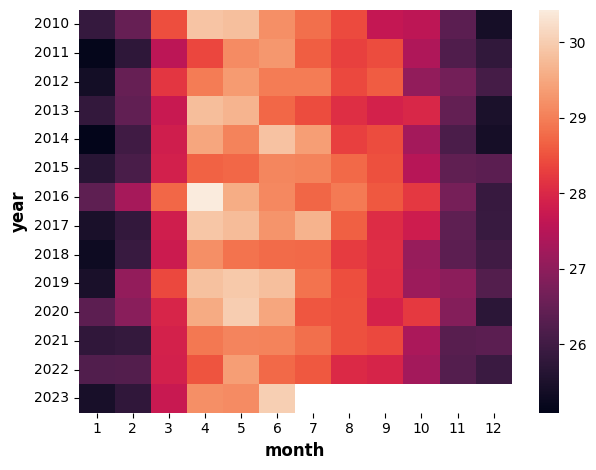

In [23]:
# Calculate the average temperature for each month
avg_temp = weather_jaffna.groupby([weather_jaffna.index.year, weather_jaffna.index.month]).aggregate(
    {'apparent_temperature_mean': 'mean', 'temperature_2m_mean': 'mean'})
avg_temp.index.names = ['year', 'month']
# Reset the index to include the year and month in each row
avg_temp = avg_temp.reset_index()
# Pivot the DataFrame to create a heatmap
glue = avg_temp.pivot(index='year', columns='month', values='temperature_2m_mean')

# Create a heatmap using Seaborn
sns.heatmap(glue)

In [24]:
# **El Nino and La Nina 2015-2016, caused significant rise in average temperature in 2016.

Text(0, 0.5, 'Average Temperature')

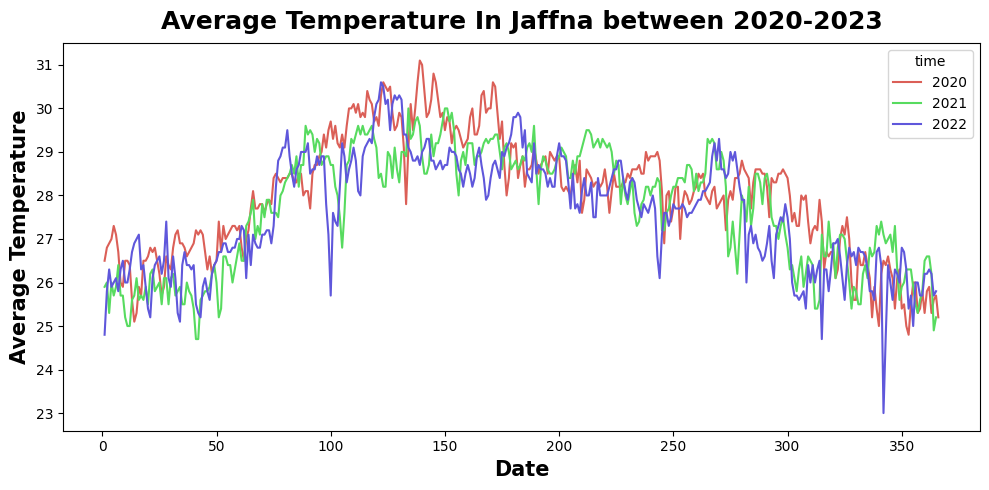

In [25]:
T = weather_jaffna.loc['2020-01-01':'2022-12-31']['temperature_2m_mean']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 3)
sns.lineplot(x=T.index.dayofyear, 
             y=T, 
             hue=T.index.year,
            palette=palette,);
plt.title('Average Temperature In Jaffna between 2020-2023')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Temperature', fontsize=15)

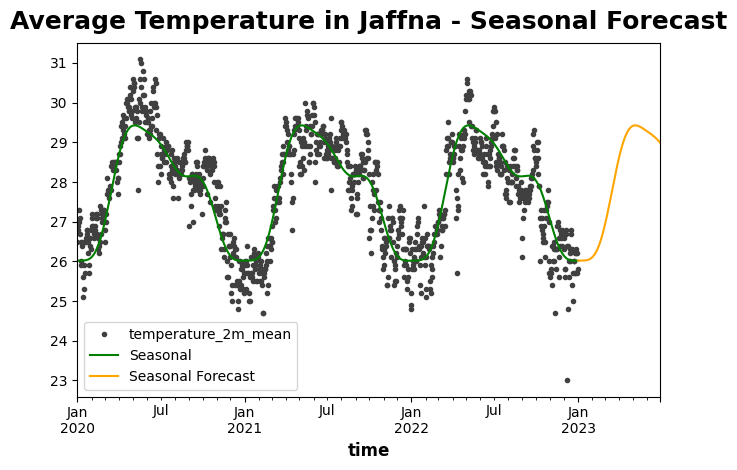

In [26]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=4) 
X = fourier.in_sample(T.index)
y = T
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2022-12-31", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Temperature in Jaffna - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'green')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='orange')
_ = ax.legend()

In [27]:
codes_list = sl_weatherdata.weathercode.unique()
codes_list

array([ 2, 51,  1,  3, 53, 61, 63,  0, 65, 55], dtype=int64)

Weather Code	Description
0	Cloud development not observed or observable
1	Clouds dissolving or becoming less developed
2	State of sky on the whole unchanged
3	Clouds generally forming or developing
51	Drizzle, not freezing, continuous ( slight at time of observation)
53	Drizzle, not freezing, continuous ( moderate at time of observation)
55	Drizzle, not freezing, continuous ( heavy (dense) at time of observation)
61	Rain, not freezing, continuous ( slight at time of observation)
63	Rain, not freezing, continuous ( moderate at time of observation)
65	Rain, not freezing, continuous ( heavy at time of observation)

Text(0, 0.5, 'Total Rainfall')

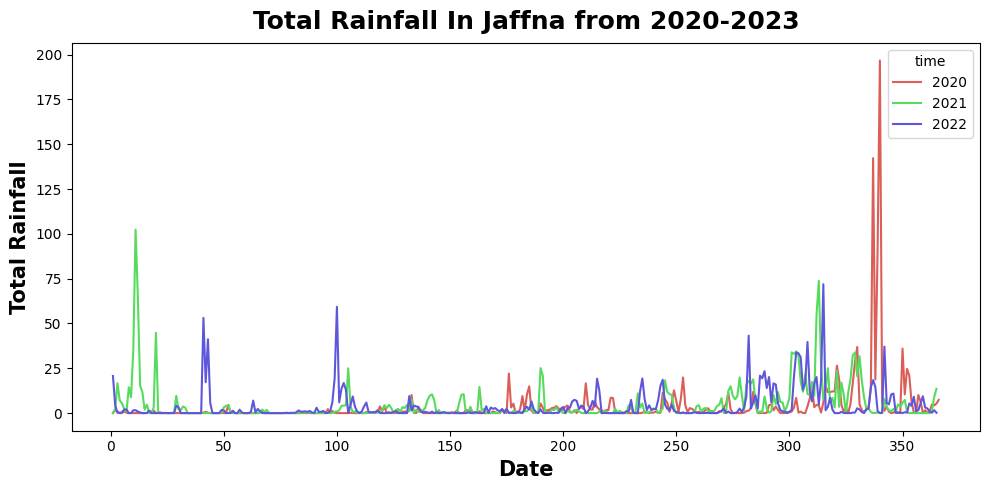

In [28]:
R = weather_jaffna.loc['2020-01-01':'2022-12-31']['rain_sum']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 3)
sns.lineplot(x=R.index.dayofyear, 
             y=R, 
             hue=R.index.year,
            palette=palette,);
plt.title('Total Rainfall In Jaffna from 2020-2023')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)

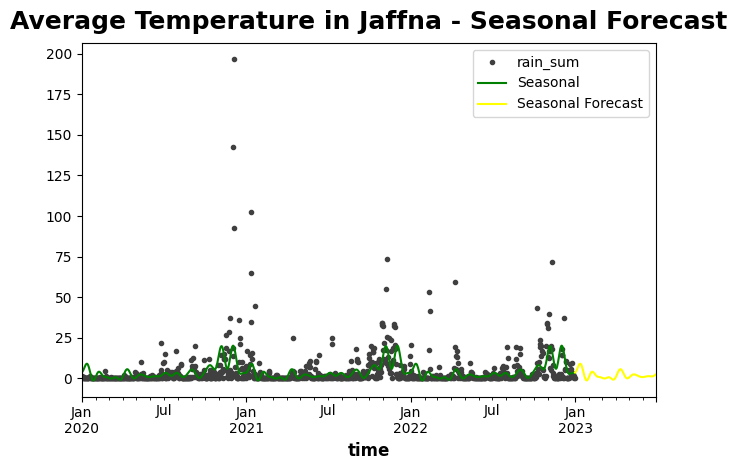

In [29]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=18) 
X = fourier.in_sample(R.index)
y = R
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2022-12-31", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Temperature in Jaffna - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'green')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='yellow')
_ = ax.legend()

In [30]:
cols = ['time' ,   'rain_sum'  ]
sl_raindata=sl_weatherdata[cols].copy()

In [31]:
sl_raindata

,time,rain_sum
0,2010-01-01,0.0
1,2010-01-02,0.1
2,2010-01-03,0.6
3,2010-01-04,0.0
4,2010-01-05,0.0
...,...,...
147475,2023-06-13,17.0
147476,2023-06-14,7.3
147477,2023-06-15,3.2
147478,2023-06-16,5.6


In [32]:
sl_raindata['rain_year']= pd.DatetimeIndex(sl_raindata['time']).year
sl_raindata['rain_month']=pd.DatetimeIndex(sl_raindata['time']).month

In [33]:
sl_raindata 

,time,rain_sum,rain_year,rain_month
0,2010-01-01,0.0,2010,1
1,2010-01-02,0.1,2010,1
2,2010-01-03,0.6,2010,1
3,2010-01-04,0.0,2010,1
4,2010-01-05,0.0,2010,1
...,...,...,...,...
147475,2023-06-13,17.0,2023,6
147476,2023-06-14,7.3,2023,6
147477,2023-06-15,3.2,2023,6
147478,2023-06-16,5.6,2023,6


In [34]:
sl_raindata.shape 

(147480, 4)

In [35]:
sl_raindata.isnull().sum()

time          0
rain_sum      0
rain_year     0
rain_month    0
dtype: int64

In [36]:
# Calculate the year and month sum
year_month_sum = sl_raindata.groupby(['rain_year','rain_month'])['rain_sum'].sum()

# Print the year and month sum
print(year_month_sum)

rain_year  rain_month
2010       1             2037.4
           2             1204.8
           3             1817.0
           4             6946.4
           5             7004.5
                          ...  
2023       2             2951.1
           3             3406.6
           4             5140.6
           5             5598.9
           6             3089.6
Name: rain_sum, Length: 162, dtype: float64


In [37]:
 rain_sum_2010_01 = year_month_sum.loc[(2010, 4)]

In [38]:
rain_sum_2010_01

6946.4

# 3)	The Flood data (Table 1 : ID 1) loaded for the analysis.  The data been used to filter out and get the Northern Province flood information.

In [39]:
# Reading the flooddata dataset
sl_flood_data_all = pd.read_csv('D:\Projects\Geopatial\Data\public_emdat_custom_request_csv.csv') 
# Displaying the dataset  
sl_flood_data_all.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0613-LKA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,LKA,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm2_code"":25846,""adm2_name"":""Galle""},{""adm...",2004-10-21,2023-09-25
1,2000-0741-LKA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,LKA,...,NaN,NaN,NaN,NaN,3000.0,5099.0,58.840648,"[{""adm2_code"":25832,""adm2_name"":""Ampara""},{""ad...",2004-10-19,2023-09-25
2,2001-0049-LKA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,LKA,...,NaN,NaN,NaN,NaN,NaN,NaN,60.503579,"[{""adm2_code"":25830,""adm2_name"":""Matale""}]",2003-07-01,2023-09-25
3,2002-0788-LKA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,LKA,...,NaN,NaN,NaN,NaN,NaN,NaN,61.463188,"[{""adm1_code"":2737,""adm1_name"":""Eastern""},{""ad...",2005-09-26,2023-09-25
4,2003-0229-LKA,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,LKA,...,NaN,NaN,NaN,NaN,29000.0,46135.0,62.858460,"[{""adm1_code"":2742,""adm1_name"":""Southern""},{""a...",2005-04-13,2023-09-25


In [40]:
sl_flood_data_all.shape 

(50, 46)

# Checking for the null

In [41]:
sl_flood_data_all.isnull().sum()

DisNo.                                        0
Historic                                      0
Classification Key                            0
Disaster Group                                0
Disaster Subgroup                             0
Disaster Type                                 0
Disaster Subtype                              0
External IDs                                 32
Event Name                                   50
ISO                                           0
Country                                       0
Subregion                                     0
Region                                        0
Location                                      0
Origin                                        4
Associated Types                             26
OFDA Response                                 0
Appeal                                        0
Declaration                                   0
AID Contribution ('000 US$)                  42
Magnitude                               

# Coping the data to another variable aflood

In [42]:
flcols=[ 'Location','Origin','Latitude','Longitude','Admin Units','Start Year','Start Month','End Year','End Month','Magnitude','Disaster Type']
aflood = sl_flood_data_all[flcols].copy()

In [43]:
aflood

,Location,Origin,Latitude,Longitude,Admin Units,Start Year,Start Month,End Year,End Month,Magnitude,Disaster Type
0,"Galle, Matara districts (Southern province)",Heavy rains,NaN,NaN,"[{""adm2_code"":25846,""adm2_name"":""Galle""},{""adm...",2000,9,2000,9,8000.00,Flood
1,"Ampara, Batticaloa districts (Eastern province...",Monsoonal rain,NaN,NaN,"[{""adm2_code"":25832,""adm2_name"":""Ampara""},{""ad...",2000,11,2000,11,7600.00,Flood
2,Matale district (Central province),NaN,NaN,NaN,"[{""adm2_code"":25830,""adm2_name"":""Matale""}]",2001,2,2001,2,NaN,Flood
3,"Polonnaruwa, Anuradhapra districts (North Cent...",Heavy rain,NaN,NaN,"[{""adm1_code"":2737,""adm1_name"":""Eastern""},{""ad...",2002,12,2002,12,14150.00,Flood
4,"Ratnapura district (Sabaragamuwa province), Ka...",Monsoon rain,NaN,NaN,"[{""adm1_code"":2742,""adm1_name"":""Southern""},{""a...",2003,5,2003,5,13490.00,Flood
5,"Kilinochchi, Jaffna, Vavuniya, Mullattivu dist...",Monsoonal rain,NaN,NaN,"[{""adm1_code"":2737,""adm1_name"":""Eastern""},{""ad...",2004,12,2004,12,23460.00,Flood
6,"Colombo, Gampaha districts (Western province),...",Monsoonal rain,NaN,NaN,"[{""adm2_code"":25834,""adm2_name"":""Trincomalee""}...",2005,11,2005,11,29870.00,Flood
7,"Galle, Matara districts (Southern province), B...",Inter-Monsoonal rain and storms,7.32000,80.030,"[{""adm1_code"":2739,""adm1_name"":""North Western""...",2006,10,2006,11,6890.00,Flood
8,"Walapane village (Nuwara Eliya district, Centr...",Heavy rains,6.71000,80.950,"[{""adm2_code"":41749,""adm2_name"":""Nuwara Eliya""}]",2007,1,2007,1,10420.00,Flood
9,"Galle district (Southern province), Western pr...",Heavy rain,6.49000,80.080,"[{""adm1_code"":2744,""adm1_name"":""Western""},{""ad...",2007,5,2007,5,3340.00,Flood


# Sl_flood_data dataset been created with the column 'Start Year','Start Month','End Year','End Month','Magnitude'

In [44]:
floodcols=['Start Year','Start Month','End Year','End Month','Magnitude' ]
sl_flood_data=sl_flood_data_all[floodcols].copy()

In [45]:
sl_flood_data

,Start Year,Start Month,End Year,End Month,Magnitude
0,2000,9,2000,9,8000.00
1,2000,11,2000,11,7600.00
2,2001,2,2001,2,NaN
3,2002,12,2002,12,14150.00
4,2003,5,2003,5,13490.00
5,2004,12,2004,12,23460.00
6,2005,11,2005,11,29870.00
7,2006,10,2006,11,6890.00
8,2007,1,2007,1,10420.00
9,2007,5,2007,5,3340.00


# Reviewing the location of the flood data and looking at Northern Province data including (Jaffna, Kilinochchi, Mannar, Mullaitivu and Vavuniya)

In [46]:
aflood['Location']

0           Galle, Matara districts (Southern province)
1     Ampara, Batticaloa districts (Eastern province...
2                    Matale district (Central province)
3     Polonnaruwa, Anuradhapra districts (North Cent...
4     Ratnapura district (Sabaragamuwa province), Ka...
5     Kilinochchi, Jaffna, Vavuniya, Mullattivu dist...
6     Colombo, Gampaha districts (Western province),...
7     Galle, Matara districts (Southern province), B...
8     Walapane village (Nuwara Eliya district, Centr...
9     Galle district (Southern province), Western pr...
10      Batticaloa, Ampara districts (Eastern province)
11    Mannar district (Northern province), Ratnapura...
12    Galle, Matara districts (Southern province), P...
13    Chankanai, Chavakachcheri, Delft, Jaffna, Kara...
14    Vavuniya district (Northern province), Ratnapu...
15                  Colombo district (Western province)
16      Batticaloa, Ampara districts (Eastern province)
17    Galle, Matara districts (Southern province

# Adding filter for the Northern Province flood locations

In [47]:
import re

# Sample data
data =  aflood['Location']

regex_list = [
    r'([Jj]affna)',
    r'([Kk]ilinochchi)',
    r'([Mm]annar)',
    r'([Mm]ullaitivu)',
    r'([Vv]avuniya)',
    r'([Nn]othern Provice)'
]

matched_locations = []

for location in data:
    for regex in regex_list:
        match = re.search(regex, location)
        if match:
            matched_locations.append(match.group(1))
            break

print(matched_locations)

['Kilinochchi', 'Jaffna', 'Jaffna', 'Mannar', 'Jaffna', 'Vavuniya', 'Jaffna', 'Vavuniya', 'Jaffna', 'Kilinochchi', 'Jaffna', 'Jaffna', 'Vavuniya', 'Jaffna', 'Jaffna', 'Jaffna', 'Jaffna']


In [48]:
import re

# Sample data
# data =  aflood['Location']

# Create a pandas DataFrame
df = pd.DataFrame({
    "Location": aflood['Location']
})

# Create a regular expression list
regex_list = [
    r'([Jj]affna)',
    r'([Kk]ilinochchi)',
    r'([Mm]annar)',
    r'([Mm]ullaitivu)',
    r'([Vv]avuniya)',
    r'([Nn]orthern Provice)'
]

# Filter rows based on regex patterns
filtered_df = df[df['Location'].str.match('|'.join(regex_list))]

# Display filtered rows
print(filtered_df)

                                             Location
5   Kilinochchi, Jaffna, Vavuniya, Mullattivu dist...
11  Mannar district (Northern province), Ratnapura...
14  Vavuniya district (Northern province), Ratnapu...
19  Vavuniya district (Northern province), Central...
30  Kilinochchi district (Northern province), Colo...
42  Mannar, Jaffna, Kilinorchchi, Mullaitivu, Vavu...


In [49]:
 # adding additional data
additional_data_df = pd.DataFrame({
    "Latitude": aflood['Latitude'],
    "Longitude": aflood['Longitude'],
    "Location": aflood['Location'],
     'Start Year': aflood['Start Year'],
    'Start Month': aflood['Start Month'],
    'Magnitude': aflood['Magnitude']  
})

In [50]:
additional_data_df

,Latitude,Longitude,Location,Start Year,Start Month,Magnitude
0,NaN,NaN,"Galle, Matara districts (Southern province)",2000,9,8000.00
1,NaN,NaN,"Ampara, Batticaloa districts (Eastern province...",2000,11,7600.00
2,NaN,NaN,Matale district (Central province),2001,2,NaN
3,NaN,NaN,"Polonnaruwa, Anuradhapra districts (North Cent...",2002,12,14150.00
4,NaN,NaN,"Ratnapura district (Sabaragamuwa province), Ka...",2003,5,13490.00
5,NaN,NaN,"Kilinochchi, Jaffna, Vavuniya, Mullattivu dist...",2004,12,23460.00
6,NaN,NaN,"Colombo, Gampaha districts (Western province),...",2005,11,29870.00
7,7.32000,80.030,"Galle, Matara districts (Southern province), B...",2006,10,6890.00
8,6.71000,80.950,"Walapane village (Nuwara Eliya district, Centr...",2007,1,10420.00
9,6.49000,80.080,"Galle district (Southern province), Western pr...",2007,5,3340.00


In [51]:
northernprovince_df =filtered_df.merge(additional_data_df, on='Location')
# Display the merged DataFrame
print(northernprovince_df)

                                            Location  Latitude  Longitude  \
0  Kilinochchi, Jaffna, Vavuniya, Mullattivu dist...       NaN        NaN   
1  Mannar district (Northern province), Ratnapura...     7.830      80.82   
2  Vavuniya district (Northern province), Ratnapu...       NaN        NaN   
3  Vavuniya district (Northern province), Central...     7.603      81.25   
4  Kilinochchi district (Northern province), Colo...       NaN        NaN   
5  Mannar, Jaffna, Kilinorchchi, Mullaitivu, Vavu...       NaN        NaN   

   Start Year  Start Month  Magnitude  
0        2004           12    23460.0  
1        2008            3    43220.0  
2        2009            8        NaN  
3        2011            1    22133.0  
4        2016            5        NaN  
5        2020           12        NaN  


In [52]:
 
# Fill NaN values with the mean of the 'Magnitude' column
northernprovince_df['Magnitude'].fillna(northernprovince_df['Magnitude'].mean(), inplace=True)

In [53]:
northernprovince_df

,Location,Latitude,Longitude,Start Year,Start Month,Magnitude
0,"Kilinochchi, Jaffna, Vavuniya, Mullattivu dist...",NaN,NaN,2004,12,23460.000000
1,"Mannar district (Northern province), Ratnapura...",7.830,80.82,2008,3,43220.000000
2,"Vavuniya district (Northern province), Ratnapu...",NaN,NaN,2009,8,29604.333333
3,"Vavuniya district (Northern province), Central...",7.603,81.25,2011,1,22133.000000
4,"Kilinochchi district (Northern province), Colo...",NaN,NaN,2016,5,29604.333333
5,"Mannar, Jaffna, Kilinorchchi, Mullaitivu, Vavu...",NaN,NaN,2020,12,29604.333333


In [54]:
northernprovince_df.shape

(6, 6)

In [55]:
 
#dropping unwanted, redundant columns
weather_np = northernprovince_df.drop(columns = ['Location', 'Latitude', 'Longitude' 
                                            ])
# weather_jaffna.set_index('time', drop = True, inplace = True)
weather_np.head()

,Start Year,Start Month,Magnitude
0,2004,12,23460.000000
1,2008,3,43220.000000
2,2009,8,29604.333333
3,2011,1,22133.000000
4,2016,5,29604.333333


In [56]:
weather_np.shape 

(6, 3)

In [57]:
weather_np.isnull().sum()

Start Year     0
Start Month    0
Magnitude      0
dtype: int64

In [58]:
weather_north=weather_np.copy()

In [59]:
weather_north

,Start Year,Start Month,Magnitude
0,2004,12,23460.000000
1,2008,3,43220.000000
2,2009,8,29604.333333
3,2011,1,22133.000000
4,2016,5,29604.333333
5,2020,12,29604.333333


In [60]:
 # sl_flood_data['Disaster Type']=sl_flood_data['Disaster Type'].replace('Flood',1 )
# Create a dictionary mapping month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',
              8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Replace month numbers with month names in the DataFrame
weather_np['Start Month'].replace(month_names, inplace=True)
print(weather_np)

   Start Year Start Month     Magnitude
0        2004         Dec  23460.000000
1        2008         Mar  43220.000000
2        2009         Aug  29604.333333
3        2011         Jan  22133.000000
4        2016         May  29604.333333
5        2020         Dec  29604.333333


In [61]:
#  data = [
#     [2004, 12, 23460.0],
#     [2008, 3, 43220.0],
#     [2009, 8, 29604.333333],
#     [2011, 1, 22133.0],
#     [2016, 5, 29604.333333]
# ]

In [62]:
 month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Magnitude']


In [63]:
 df = pd.DataFrame(weather_np, columns=['Start Year', 'Start Month'] + month_names)

# Pivot the DataFrame to the desired format
df_pivoted = df.pivot_table(index='Start Year', values='Magnitude', columns='Start Month', aggfunc='sum')


In [64]:
df_pivoted = df_pivoted.reset_index()


In [65]:
df_pivoted

Start Month,Start Year,Aug,Dec,Jan,Mar,May
0,2004,NaN,23460.000000,NaN,NaN,NaN
1,2008,NaN,NaN,NaN,43220.0,NaN
2,2009,29604.333333,NaN,NaN,NaN,NaN
3,2011,NaN,NaN,22133.0,NaN,NaN
4,2016,NaN,NaN,NaN,NaN,29604.333333
5,2020,NaN,29604.333333,NaN,NaN,NaN


In [66]:
cities = sl_weatherdata.city.unique()
#collecting rain data for Nothern Province

 
def date_time(row):
    new_time = pd.to_datetime(row['time'])
    row['time'] = new_time
    return row

city_list = ['Jaffna', 'Kilinochchi', 'Mannar', 'Mullaitivu', 'Vavuniya']

# Filter cities based on the provided list
weather_sl_np = sl_weatherdata[sl_weatherdata['city'].isin(city_list)]

# Apply the date_time function to each row
weather_sl_np = weather_sl_np.apply(date_time, axis=1)

# Dropping unwanted columns
weather_np = weather_sl_np.drop(
    columns=['country', 'temperature_2m_max', 'temperature_2m_min',
             'sunrise', 'sunset', 'apparent_temperature_max',
             'apparent_temperature_min', 'snowfall_sum', 'longitude',
             'latitude', 'elevation','weathercode','temperature_2m_mean',
             'apparent_temperature_mean' ,'shortwave_radiation_sum',
            'precipitation_sum','precipitation_hours','windspeed_10m_max' ,
             'windgusts_10m_max','winddirection_10m_dominant','et0_fao_evapotranspiration'
            
            ]
)

# Set the 'time' column as the index
weather_np.set_index('time', inplace=False, drop=True)

# Display the first few rows
print(weather_np.head())


            time  rain_sum    city
58992 2010-01-01       0.0  Jaffna
58993 2010-01-02       1.0  Jaffna
58994 2010-01-03       0.2  Jaffna
58995 2010-01-04       0.0  Jaffna
58996 2010-01-05       0.0  Jaffna


In [67]:
import re

# Sample data
# data =  aflood['Location']

# Create a pandas DataFrame
df2 = pd.DataFrame({
    "Location": aflood['Location']
})

# Create a regular expression list
regex_list = [
    r'([Jj]affna)',
    r'([Kk]ilinochchi)',
    r'([Mm]annar)',
    r'([Mm]ullaitivu)',
    r'([Vv]avuniya)',
    r'([Nn]orth)',
    r'([Aa]nuradhapura)',
    r'([Pp]olonnaruwa)',
    r'([Kk]urunegala)' ,
    r'([Pp]uttalam)' 
]

# Filter rows based on regex patterns
filtered_df2 = df2[df2['Location'].str.match('|'.join(regex_list))]

# Display filtered rows
print(filtered_df2)

                                             Location
3   Polonnaruwa, Anuradhapra districts (North Cent...
5   Kilinochchi, Jaffna, Vavuniya, Mullattivu dist...
11  Mannar district (Northern province), Ratnapura...
14  Vavuniya district (Northern province), Ratnapu...
19  Vavuniya district (Northern province), Central...
30  Kilinochchi district (Northern province), Colo...
33  Puttalam,Gampaha, Ratnapura, Colombo, Kurunega...
40  North-west, and East provinces; Mullative, Kil...
41                        Puttalam, Gampaha districts
42  Mannar, Jaffna, Kilinorchchi, Mullaitivu, Vavu...


In [68]:
# jaffna_wd = pd.read_csv('D:\Projects\Geopatial\Data\Jaffna 2021-01-01 to 2023-08-31.csv')
# jaffna_wd.head(5)

# 4)	Jaffna Weather data (Table 1 : ID 2)loaded for the rain event analysis. 
# This data been taken as a primary rain data for analysis. There are multiple files to merge.  

In [142]:
import pandas as pd
import os

data_path = 'D:\Projects\Geopatial\Data\Weatherdata'
data_frames = []

for filename in os.listdir(data_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_path, filename)
        data_frame = pd.read_csv(file_path)
        data_frames.append(data_frame)

# Concatenate all data frames into a single data frame
com_jaffna_df = pd.concat(data_frames)

print(com_jaffna_df)

       name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0    jaffna  2002-06-01     31.2     28.9  30.1          39.6          34.4   
1    jaffna  2002-06-02     31.1     30.1  30.6          38.0          36.5   
2    jaffna  2002-06-03     30.1     30.1  30.1          36.5          36.5   
3    jaffna  2002-06-04     31.9     28.9  30.3          39.9          33.8   
4    jaffna  2002-06-05     31.4     28.9  30.2          38.5          34.1   
..      ...         ...      ...      ...   ...           ...           ...   
968  Jaffna  2023-08-27     32.6     27.9  29.0          40.6          31.2   
969  Jaffna  2023-08-28     31.8     27.9  28.9          38.8          32.1   
970  Jaffna  2023-08-29     31.8     27.7  28.8          39.9          31.8   
971  Jaffna  2023-08-30     33.3     26.7  28.9          40.9          26.7   
972  Jaffna  2023-08-31     33.0     27.4  28.8          41.2          30.9   

     feelslike   dew  humidity  ...  solarenergy  u

In [143]:
com_jaffna_df.shape

(7762, 33)

# Data been reviewed with shape and null rows count.

In [144]:
com_jaffna_df.isnull().sum()

name                   0
datetime               0
tempmax              147
tempmin              147
temp                 147
feelslikemax         147
feelslikemin         147
feelslike            147
dew                  148
humidity             147
precip               148
precipprob           147
precipcover            0
preciptype          4666
snow                7169
snowdepth           7762
windgust            7163
windspeed              0
winddir              165
sealevelpressure    2785
cloudcover           147
visibility           165
solarradiation      2771
solarenergy         2771
uvindex             2771
severerisk          7163
sunrise                0
sunset                 0
moonphase              0
conditions           147
description          147
icon                 147
stations             147
dtype: int64

# The data been filtered and selected column been copied for analysis

In [145]:
cols = ['name','datetime' ,   'precip'  ]
jaffna_df_sl=com_jaffna_df[cols].copy()

In [146]:
jaffna_df_sl

,name,datetime,precip
0,jaffna,2002-06-01,0.0
1,jaffna,2002-06-02,0.0
2,jaffna,2002-06-03,0.0
3,jaffna,2002-06-04,0.0
4,jaffna,2002-06-05,0.0
...,...,...,...
968,Jaffna,2023-08-27,0.0
969,Jaffna,2023-08-28,0.0
970,Jaffna,2023-08-29,0.2
971,Jaffna,2023-08-30,3.9


In [147]:
jaffna_df_sl['datetime']

0      2002-06-01
1      2002-06-02
2      2002-06-03
3      2002-06-04
4      2002-06-05
          ...    
968    2023-08-27
969    2023-08-28
970    2023-08-29
971    2023-08-30
972    2023-08-31
Name: datetime, Length: 7762, dtype: object

# Month column and year column been created based on datetime column value

In [148]:
jaffna_df_sl['month'] = pd.DatetimeIndex(jaffna_df_sl['datetime']).month
jaffna_df_sl['year'] = pd.DatetimeIndex(jaffna_df_sl['datetime']).year
# jaffna_df_sl['date'] = pd.to_datetime(jaffna_df_sl['datetime'])

In [149]:
jaffna_df_sl['datetime']

0      2002-06-01
1      2002-06-02
2      2002-06-03
3      2002-06-04
4      2002-06-05
          ...    
968    2023-08-27
969    2023-08-28
970    2023-08-29
971    2023-08-30
972    2023-08-31
Name: datetime, Length: 7762, dtype: object

In [150]:
jaffna_df_sl['month']

0      6
1      6
2      6
3      6
4      6
      ..
968    8
969    8
970    8
971    8
972    8
Name: month, Length: 7762, dtype: int32

In [151]:
jaffna_df_sl['year']

0      2002
1      2002
2      2002
3      2002
4      2002
       ... 
968    2023
969    2023
970    2023
971    2023
972    2023
Name: year, Length: 7762, dtype: int32

In [152]:
jaffna_df_sl.isnull().sum()

name          0
datetime      0
precip      148
month         0
year          0
dtype: int64

In [153]:
jaffna_df_sl.dtypes

name         object
datetime     object
precip      float64
month         int32
year          int32
dtype: object

# Month data been updated based on the month number value

In [154]:
# Create a dictionary mapping month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',
              8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Replace month numbers with month names in the DataFrame
jaffna_df_sl['month'].replace(month_names, inplace=True)
print(jaffna_df_sl)

       name    datetime  precip month  year
0    jaffna  2002-06-01     0.0   Jun  2002
1    jaffna  2002-06-02     0.0   Jun  2002
2    jaffna  2002-06-03     0.0   Jun  2002
3    jaffna  2002-06-04     0.0   Jun  2002
4    jaffna  2002-06-05     0.0   Jun  2002
..      ...         ...     ...   ...   ...
968  Jaffna  2023-08-27     0.0   Aug  2023
969  Jaffna  2023-08-28     0.0   Aug  2023
970  Jaffna  2023-08-29     0.2   Aug  2023
971  Jaffna  2023-08-30     3.9   Aug  2023
972  Jaffna  2023-08-31     1.8   Aug  2023

[7762 rows x 5 columns]


In [155]:
jaffna_df_sl["year"]

0      2002
1      2002
2      2002
3      2002
4      2002
       ... 
968    2023
969    2023
970    2023
971    2023
972    2023
Name: year, Length: 7762, dtype: int32

In [156]:
jaffna_df_sl["datetime"]

0      2002-06-01
1      2002-06-02
2      2002-06-03
3      2002-06-04
4      2002-06-05
          ...    
968    2023-08-27
969    2023-08-28
970    2023-08-29
971    2023-08-30
972    2023-08-31
Name: datetime, Length: 7762, dtype: object

# Data been populated into a pivot table

In [157]:
month_names2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','precip' ]
df2 = pd.DataFrame(jaffna_df_sl, columns=[ 'year', 'month'] + month_names2)

# Pivot the DataFrame to the desired format
df_jaff_pivoted = df2.pivot_table(index='year', values='precip', columns='month', aggfunc='sum')
df_jaff_pivoted = df_jaff_pivoted.reset_index()
df_jaff_pivoted


month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2002,NaN,0.700,111.400,NaN,NaN,0.000,2.300,NaN,NaN,102.800,321.000,0.800
1,2003,108.200,26.900,13.200,35.100,45.300,1.800,4.300,62.900,113.600,379.500,255.200,0.000
2,2004,15.200,4.300,182.700,0.300,1.000,0.800,0.500,27.400,156.900,251.600,265.400,65.200
3,2005,187.000,0.000,93.600,0.000,37.400,4.000,0.300,57.500,61.000,378.200,120.300,0.000
4,2006,15.000,7.000,40.200,4.100,27.100,0.000,0.000,103.700,0.000,285.300,298.500,27.200
5,2007,46.000,14.698,333.455,24.600,23.000,16.999,14.303,4.600,0.000,171.392,291.586,72.694
6,2008,88.912,72.690,136.701,37.897,0.300,12.698,28.395,194.194,23.096,389.166,178.890,6.599
7,2009,142.300,41.095,323.902,0.000,5.401,2.999,2.300,107.592,13.698,372.079,43.498,23.696
8,2010,83.297,140.783,400.782,1.000,61.497,10.699,34.395,4.800,131.889,493.082,115.898,157.591
9,2011,222.605,40.404,308.375,17.707,113.105,7.700,1.000,5.201,13.898,523.879,338.279,33.794


In [158]:
# # Include the 'name' column in the columns list
# month_names3 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'precip']
# df3 = pd.DataFrame(jaffna_df_sl, columns=[ 'year', 'month'] + month_names3)

# # Pivot the DataFrame to the desired format
# df_jaff_pvt = df3.pivot_table(index='year', values='precip', columns='month', aggfunc='sum')

# # Reset the index to obtain a DataFrame with columns for year and each month's precipitation
# df_jaff_pvt = df_jaff_pvt.reset_index()
# df_jaff_pvt['district']='Jaffna'
 

# Total Precip column added with pivot table

In [159]:
import pandas as pd

# Create a list of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a DataFrame with year, month, and precipitation columns
df2 = pd.DataFrame(jaffna_df_sl, columns=['year', 'month', 'precip'])

# Pivot the DataFrame to the desired format
df_jaff_pivoted = df2.pivot_table(index='year', values='precip', columns='month', aggfunc='sum')

# Reset the index to obtain a DataFrame with columns for year and each month's precipitation
df_jaff_pivoted = df_jaff_pivoted.reset_index()

# Add a column for the total precipitation for each year
df_jaff_pivoted['Total Precip'] = df_jaff_pivoted.iloc[:, 1:].sum(axis=1)

print(df_jaff_pivoted)


month  year      Apr      Aug      Dec      Feb      Jan      Jul     Jun  \
0      2002      NaN    0.700  111.400      NaN      NaN    0.000   2.300   
1      2003  108.200   26.900   13.200   35.100   45.300    1.800   4.300   
2      2004   15.200    4.300  182.700    0.300    1.000    0.800   0.500   
3      2005  187.000    0.000   93.600    0.000   37.400    4.000   0.300   
4      2006   15.000    7.000   40.200    4.100   27.100    0.000   0.000   
5      2007   46.000   14.698  333.455   24.600   23.000   16.999  14.303   
6      2008   88.912   72.690  136.701   37.897    0.300   12.698  28.395   
7      2009  142.300   41.095  323.902    0.000    5.401    2.999   2.300   
8      2010   83.297  140.783  400.782    1.000   61.497   10.699  34.395   
9      2011  222.605   40.404  308.375   17.707  113.105    7.700   1.000   
10     2012   79.795    9.098  320.513   10.900   11.408  176.070   0.800   
11     2013   72.290   83.194  114.806  168.789  159.397    7.000   0.300   

In [160]:
 df_jaff_pivoted.isnull().sum()

month
year            0
Apr             1
Aug             0
Dec             1
Feb             1
Jan             1
Jul             0
Jun             0
Mar             1
May             1
Nov             1
Oct             1
Sep             1
Total Precip    0
dtype: int64

In [161]:
# values = {'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}
# df_jaff_pvt =df_jaff_pivoted.fillna(value=values)

# Magnitude column added based on Total Precip column

In [162]:
df_jaff_pivoted["Magnitude"]= df_jaff_pivoted['Total Precip']

In [163]:
df_jaff_pivoted

month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Total Precip,Magnitude
0,2002,NaN,0.700,111.400,NaN,NaN,0.000,2.300,NaN,NaN,102.800,321.000,0.800,539.000,539.000
1,2003,108.200,26.900,13.200,35.100,45.300,1.800,4.300,62.900,113.600,379.500,255.200,0.000,1046.000,1046.000
2,2004,15.200,4.300,182.700,0.300,1.000,0.800,0.500,27.400,156.900,251.600,265.400,65.200,971.300,971.300
3,2005,187.000,0.000,93.600,0.000,37.400,4.000,0.300,57.500,61.000,378.200,120.300,0.000,939.300,939.300
4,2006,15.000,7.000,40.200,4.100,27.100,0.000,0.000,103.700,0.000,285.300,298.500,27.200,808.100,808.100
5,2007,46.000,14.698,333.455,24.600,23.000,16.999,14.303,4.600,0.000,171.392,291.586,72.694,1013.327,1013.327
6,2008,88.912,72.690,136.701,37.897,0.300,12.698,28.395,194.194,23.096,389.166,178.890,6.599,1169.538,1169.538
7,2009,142.300,41.095,323.902,0.000,5.401,2.999,2.300,107.592,13.698,372.079,43.498,23.696,1078.560,1078.560
8,2010,83.297,140.783,400.782,1.000,61.497,10.699,34.395,4.800,131.889,493.082,115.898,157.591,1635.713,1635.713
9,2011,222.605,40.404,308.375,17.707,113.105,7.700,1.000,5.201,13.898,523.879,338.279,33.794,1625.947,1625.947


In [164]:
# Start Year 	Start Month 	Magnitude
# 0 	2004 	12 	23460.000000
# 1 	2008 	3 	43220.000000
# 2 	2009 	8 	29604.333333
# 3 	2011 	1 	22133.000000
# 4 	2016 	5 	29604.333333
weather_north.head()
 

,Start Year,Start Month,Magnitude
0,2004,12,23460.000000
1,2008,3,43220.000000
2,2009,8,29604.333333
3,2011,1,22133.000000
4,2016,5,29604.333333


In [165]:
weather_north.shape

(6, 3)

In [166]:
# for index, row in weather_np.iterrows():
#     start_year = row['Start Year']
#     start_month = row['Start Month']
#     magnitude = row['Magnitude']

#     # Print the current row's data
#     print(f"Start Year: {start_year}, Start Month: {start_month}, Magnitude: {magnitude}")

In [167]:
 
for index, row in weather_north.iterrows():
    start_year = int(row['Start Year'])
    magnitude = row['Magnitude']

    for idx, year in df_jaff_pivoted['year'].items():
        if year == start_year:
            df_jaff_pivoted.loc['Magnitude'] = magnitude
            # df_jaff_pivoted.loc[idx, 'Dec'] += 20000 #add 20000 for the magnitude the rainfall : manipulated data
            df_jaff_pivoted.loc[idx, 'Floods'] = 1 if magnitude > 0 else 0


In [168]:
df_jaff_pivoted['Floods'] = df_jaff_pivoted['Floods'].fillna(0)

In [169]:
df_jaff_pivoted['Floods'] = df_jaff_pivoted['Floods'].astype(int)

In [170]:
# df_jaff_pvt.insert(1,'District','Jaffna')
df_jaff_pivoted['Jan'].fillna(0, inplace=True)
df_jaff_pivoted['Feb'].fillna(0, inplace=True)
df_jaff_pivoted['Mar'].fillna(0, inplace=True)
df_jaff_pivoted['Apr'].fillna(0, inplace=True)
df_jaff_pivoted['May'].fillna(0, inplace=True)
df_jaff_pivoted['Jun'].fillna(0, inplace=True)
df_jaff_pivoted['Jul'].fillna(0, inplace=True)
df_jaff_pivoted['Aug'].fillna(0, inplace=True)
df_jaff_pivoted['Sep'].fillna(0, inplace=True)
df_jaff_pivoted['Oct'].fillna(0, inplace=True)
df_jaff_pivoted['Nov'].fillna(0, inplace=True)
df_jaff_pivoted['Dec'].fillna(0, inplace=True)


In [171]:
df_jaff_pivoted

month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Total Precip,Magnitude,Floods
0,2002.000000,0.000000,0.700000,111.400000,0.000000,0.000000,0.000000,2.300000,0.000000,0.000000,102.800000,321.000000,0.800000,539.000000,539.000000,0
1,2003.000000,108.200000,26.900000,13.200000,35.100000,45.300000,1.800000,4.300000,62.900000,113.600000,379.500000,255.200000,0.000000,1046.000000,1046.000000,0
2,2004.000000,15.200000,4.300000,182.700000,0.300000,1.000000,0.800000,0.500000,27.400000,156.900000,251.600000,265.400000,65.200000,971.300000,971.300000,1
3,2005.000000,187.000000,0.000000,93.600000,0.000000,37.400000,4.000000,0.300000,57.500000,61.000000,378.200000,120.300000,0.000000,939.300000,939.300000,0
4,2006.000000,15.000000,7.000000,40.200000,4.100000,27.100000,0.000000,0.000000,103.700000,0.000000,285.300000,298.500000,27.200000,808.100000,808.100000,0
5,2007.000000,46.000000,14.698000,333.455000,24.600000,23.000000,16.999000,14.303000,4.600000,0.000000,171.392000,291.586000,72.694000,1013.327000,1013.327000,0
6,2008.000000,88.912000,72.690000,136.701000,37.897000,0.300000,12.698000,28.395000,194.194000,23.096000,389.166000,178.890000,6.599000,1169.538000,1169.538000,1
7,2009.000000,142.300000,41.095000,323.902000,0.000000,5.401000,2.999000,2.300000,107.592000,13.698000,372.079000,43.498000,23.696000,1078.560000,1078.560000,1
8,2010.000000,83.297000,140.783000,400.782000,1.000000,61.497000,10.699000,34.395000,4.800000,131.889000,493.082000,115.898000,157.591000,1635.713000,1635.713000,0
9,2011.000000,222.605000,40.404000,308.375000,17.707000,113.105000,7.700000,1.000000,5.201000,13.898000,523.879000,338.279000,33.794000,1625.947000,1625.947000,1


In [172]:
df_jaff_pvt=df_jaff_pivoted.copy()

In [173]:
df_jaff_pvt

month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Total Precip,Magnitude,Floods
0,2002.000000,0.000000,0.700000,111.400000,0.000000,0.000000,0.000000,2.300000,0.000000,0.000000,102.800000,321.000000,0.800000,539.000000,539.000000,0
1,2003.000000,108.200000,26.900000,13.200000,35.100000,45.300000,1.800000,4.300000,62.900000,113.600000,379.500000,255.200000,0.000000,1046.000000,1046.000000,0
2,2004.000000,15.200000,4.300000,182.700000,0.300000,1.000000,0.800000,0.500000,27.400000,156.900000,251.600000,265.400000,65.200000,971.300000,971.300000,1
3,2005.000000,187.000000,0.000000,93.600000,0.000000,37.400000,4.000000,0.300000,57.500000,61.000000,378.200000,120.300000,0.000000,939.300000,939.300000,0
4,2006.000000,15.000000,7.000000,40.200000,4.100000,27.100000,0.000000,0.000000,103.700000,0.000000,285.300000,298.500000,27.200000,808.100000,808.100000,0
5,2007.000000,46.000000,14.698000,333.455000,24.600000,23.000000,16.999000,14.303000,4.600000,0.000000,171.392000,291.586000,72.694000,1013.327000,1013.327000,0
6,2008.000000,88.912000,72.690000,136.701000,37.897000,0.300000,12.698000,28.395000,194.194000,23.096000,389.166000,178.890000,6.599000,1169.538000,1169.538000,1
7,2009.000000,142.300000,41.095000,323.902000,0.000000,5.401000,2.999000,2.300000,107.592000,13.698000,372.079000,43.498000,23.696000,1078.560000,1078.560000,1
8,2010.000000,83.297000,140.783000,400.782000,1.000000,61.497000,10.699000,34.395000,4.800000,131.889000,493.082000,115.898000,157.591000,1635.713000,1635.713000,0
9,2011.000000,222.605000,40.404000,308.375000,17.707000,113.105000,7.700000,1.000000,5.201000,13.898000,523.879000,338.279000,33.794000,1625.947000,1625.947000,1


In [174]:
df_jaff_pvt.shape

(23, 16)

In [175]:
#checking the null values of df_jaff_pvt
df_jaff_pvt.isnull().sum()

month
year            0
Apr             0
Aug             0
Dec             0
Feb             0
Jan             0
Jul             0
Jun             0
Mar             0
May             0
Nov             0
Oct             0
Sep             0
Total Precip    0
Magnitude       0
Floods          0
dtype: int64

In [176]:
# values = {'month':0,'year':0,'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0,
#           'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0,'Total Precip':0,'Magnitude':0, 'Floods':0}
# df_jaff_pvt =df_jaff_pivoted.fillna(value=values)

In [177]:
#checking the statistics of the df_jaff_pvt
df_jaff_pvt.describe()

month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Total Precip,Magnitude,Floods
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,3212.144928,1364.651406,1343.396884,1524.026841,1320.543275,1348.343145,1320.150362,1303.543406,1330.735754,1386.483884,1658.302884,1530.615406,1364.502014,2636.701058,2636.701058,1287.391304
std,5753.298458,6156.420653,6160.928258,6124.360669,6165.856434,6160.239896,6165.945770,6169.377724,6163.674215,6152.410631,6096.135666,6121.980651,6156.492684,5902.832142,5902.832142,6172.803862
min,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,539.000000,539.000000,0.000000
25%,2007.500000,25.606000,18.299000,114.545000,7.500000,8.404500,2.899500,1.650000,4.700000,13.798000,268.450000,118.493500,25.448000,1029.663500,1029.663500,0.000000
50%,2013.000000,72.290000,40.404000,236.669000,22.800000,27.100000,7.700000,14.303000,22.419000,99.892000,378.200000,265.400000,65.200000,1373.228000,1373.228000,0.000000
75%,2018.500000,116.717000,88.539500,328.678500,36.498500,109.405500,73.753000,29.745000,83.300000,135.946500,521.162000,331.573000,145.192000,1793.876000,1793.876000,1.000000
max,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.333333,29604.000000


In [178]:
#checking the info
df_jaff_pvt.info

<bound method DataFrame.info of month              year           Apr           Aug           Dec  \
0           2002.000000      0.000000      0.700000    111.400000   
1           2003.000000    108.200000     26.900000     13.200000   
2           2004.000000     15.200000      4.300000    182.700000   
3           2005.000000    187.000000      0.000000     93.600000   
4           2006.000000     15.000000      7.000000     40.200000   
5           2007.000000     46.000000     14.698000    333.455000   
6           2008.000000     88.912000     72.690000    136.701000   
7           2009.000000    142.300000     41.095000    323.902000   
8           2010.000000     83.297000    140.783000    400.782000   
9           2011.000000    222.605000     40.404000    308.375000   
10          2012.000000     79.795000      9.098000    320.513000   
11          2013.000000     72.290000     83.194000    114.806000   
12          2014.000000     33.403000    227.081000    429.292000   
13

In [179]:
# Computing pairwise covariance of columns

df_jaff_pvt.cov()

month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Total Precip,Magnitude,Floods
month,,,,,,,,,,,,,,,,
year,3.310044e+07,3.541752e+07,3.544427e+07,3.521797e+07,3.547294e+07,3.543818e+07,3.547347e+07,3.549419e+07,3.545994e+07,3.539036e+07,3.504957e+07,3.520947e+07,3.541786e+07,3.382416e+07,3.382416e+07,3.551396e+07
Apr,3.541752e+07,3.790152e+07,3.792553e+07,3.768394e+07,3.795583e+07,3.792118e+07,3.795698e+07,3.797877e+07,3.794226e+07,3.786538e+07,3.750705e+07,3.767711e+07,3.789614e+07,3.620319e+07,3.620319e+07,3.800000e+07
Aug,3.544427e+07,3.792553e+07,3.795704e+07,3.771378e+07,3.798488e+07,3.794850e+07,3.798489e+07,3.800756e+07,3.797095e+07,3.789659e+07,3.753496e+07,3.770282e+07,3.792675e+07,3.623114e+07,3.623114e+07,3.802859e+07
Dec,3.521797e+07,3.768394e+07,3.771378e+07,3.750779e+07,3.773888e+07,3.770414e+07,3.774632e+07,3.776473e+07,3.772377e+07,3.765398e+07,3.730368e+07,3.746090e+07,3.769268e+07,3.604521e+07,3.604521e+07,3.778556e+07
Feb,3.547294e+07,3.795583e+07,3.798488e+07,3.773888e+07,3.801779e+07,3.797875e+07,3.801609e+07,3.803826e+07,3.800204e+07,3.792817e+07,3.755752e+07,3.773075e+07,3.795613e+07,3.624371e+07,3.624371e+07,3.805934e+07
Jan,3.543818e+07,3.792118e+07,3.794850e+07,3.770414e+07,3.797875e+07,3.794856e+07,3.797910e+07,3.800129e+07,3.796386e+07,3.788913e+07,3.753335e+07,3.770164e+07,3.791957e+07,3.623919e+07,3.623919e+07,3.802193e+07
Jul,3.547347e+07,3.795698e+07,3.798489e+07,3.774632e+07,3.801609e+07,3.797910e+07,3.801889e+07,3.803875e+07,3.800119e+07,3.792627e+07,3.755950e+07,3.773620e+07,3.795852e+07,3.625549e+07,3.625549e+07,3.805987e+07
Jun,3.549419e+07,3.797877e+07,3.800756e+07,3.776473e+07,3.803826e+07,3.800129e+07,3.803875e+07,3.806122e+07,3.802422e+07,3.795027e+07,3.758588e+07,3.775600e+07,3.797911e+07,3.627304e+07,3.627304e+07,3.808222e+07
Mar,3.545994e+07,3.794226e+07,3.797095e+07,3.772377e+07,3.800204e+07,3.796386e+07,3.800119e+07,3.802422e+07,3.799088e+07,3.791122e+07,3.754662e+07,3.771658e+07,3.794171e+07,3.622479e+07,3.622479e+07,3.804563e+07


In [180]:
# Calculating the relationship between each column in dataset / Calculating correlation coefficients

df_jaff_pvt.corr()

month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Total Precip,Magnitude,Floods
month,,,,,,,,,,,,,,,,
year,1.000000,0.999938,0.999961,0.999509,0.999970,0.999901,0.999970,0.999998,0.999957,0.999822,0.999335,0.999656,0.999936,0.995978,0.995978,0.999999
Apr,0.999938,1.000000,0.999901,0.999464,0.999901,0.999898,0.999916,0.999934,0.999897,0.999698,0.999378,0.999672,0.999846,0.996227,0.996227,0.999937
Aug,0.999961,0.999901,1.000000,0.999524,0.999934,0.999887,0.999919,0.999960,0.999921,0.999790,0.999391,0.999622,0.999922,0.996266,0.996266,0.999958
Dec,0.999509,0.999464,0.999524,1.000000,0.999390,0.999380,0.999572,0.999503,0.999343,0.999321,0.999163,0.999138,0.999684,0.997072,0.997072,0.999500
Feb,0.999970,0.999901,0.999934,0.999390,1.000000,0.999884,0.999941,0.999967,0.999940,0.999823,0.999192,0.999563,0.999897,0.995815,0.995815,0.999966
Jan,0.999901,0.999898,0.999887,0.999380,0.999884,1.000000,0.999879,0.999906,0.999846,0.999705,0.999459,0.999702,0.999844,0.996599,0.996599,0.999894
Jul,0.999970,0.999916,0.999919,0.999572,0.999941,0.999879,1.000000,0.999966,0.999903,0.999758,0.999230,0.999693,0.999945,0.996125,0.996125,0.999966
Jun,0.999998,0.999934,0.999960,0.999503,0.999967,0.999906,0.999966,1.000000,0.999952,0.999835,0.999376,0.999661,0.999931,0.996052,0.996052,0.999996
Mar,0.999957,0.999897,0.999921,0.999343,0.999940,0.999846,0.999903,0.999952,1.000000,0.999730,0.999255,0.999541,0.999871,0.995648,0.995648,0.999960


In [181]:
 # Target column of Jaffna rain and flood data
tar = df_jaff_pvt.iloc[:,-1]
tar

0                0
1                0
2                1
3                0
4                0
5                0
6                1
7                1
8                0
9                1
10               0
11               0
12               0
13               0
14               1
15               0
16               0
17               0
18               1
19               0
20               0
21               0
Magnitude    29604
Name: Floods, dtype: int32

In [182]:
# Features/columns for the months between Jan-Dec
mth = df_jaff_pvt.iloc[:,1:13]
# First n rows of the dataset  
mth.head()

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0.0,0.7,111.4,0.0,0.0,0.0,2.3,0.0,0.0,102.8,321.0,0.8
1,108.2,26.9,13.2,35.1,45.3,1.8,4.3,62.9,113.6,379.5,255.2,0.0
2,15.2,4.3,182.7,0.3,1.0,0.8,0.5,27.4,156.9,251.6,265.4,65.2
3,187.0,0.0,93.6,0.0,37.4,4.0,0.3,57.5,61.0,378.2,120.3,0.0
4,15.0,7.0,40.2,4.1,27.1,0.0,0.0,103.7,0.0,285.3,298.5,27.2


In [183]:
df_jaff_pvt

month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Total Precip,Magnitude,Floods
0,2002.000000,0.000000,0.700000,111.400000,0.000000,0.000000,0.000000,2.300000,0.000000,0.000000,102.800000,321.000000,0.800000,539.000000,539.000000,0
1,2003.000000,108.200000,26.900000,13.200000,35.100000,45.300000,1.800000,4.300000,62.900000,113.600000,379.500000,255.200000,0.000000,1046.000000,1046.000000,0
2,2004.000000,15.200000,4.300000,182.700000,0.300000,1.000000,0.800000,0.500000,27.400000,156.900000,251.600000,265.400000,65.200000,971.300000,971.300000,1
3,2005.000000,187.000000,0.000000,93.600000,0.000000,37.400000,4.000000,0.300000,57.500000,61.000000,378.200000,120.300000,0.000000,939.300000,939.300000,0
4,2006.000000,15.000000,7.000000,40.200000,4.100000,27.100000,0.000000,0.000000,103.700000,0.000000,285.300000,298.500000,27.200000,808.100000,808.100000,0
5,2007.000000,46.000000,14.698000,333.455000,24.600000,23.000000,16.999000,14.303000,4.600000,0.000000,171.392000,291.586000,72.694000,1013.327000,1013.327000,0
6,2008.000000,88.912000,72.690000,136.701000,37.897000,0.300000,12.698000,28.395000,194.194000,23.096000,389.166000,178.890000,6.599000,1169.538000,1169.538000,1
7,2009.000000,142.300000,41.095000,323.902000,0.000000,5.401000,2.999000,2.300000,107.592000,13.698000,372.079000,43.498000,23.696000,1078.560000,1078.560000,1
8,2010.000000,83.297000,140.783000,400.782000,1.000000,61.497000,10.699000,34.395000,4.800000,131.889000,493.082000,115.898000,157.591000,1635.713000,1635.713000,0
9,2011.000000,222.605000,40.404000,308.375000,17.707000,113.105000,7.700000,1.000000,5.201000,13.898000,523.879000,338.279000,33.794000,1625.947000,1625.947000,1


In [184]:
df_jaff_pvt.isnull().sum()

month
year            0
Apr             0
Aug             0
Dec             0
Feb             0
Jan             0
Jul             0
Jun             0
Mar             0
May             0
Nov             0
Oct             0
Sep             0
Total Precip    0
Magnitude       0
Floods          0
dtype: int64

D:\Projects\Geopatial\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


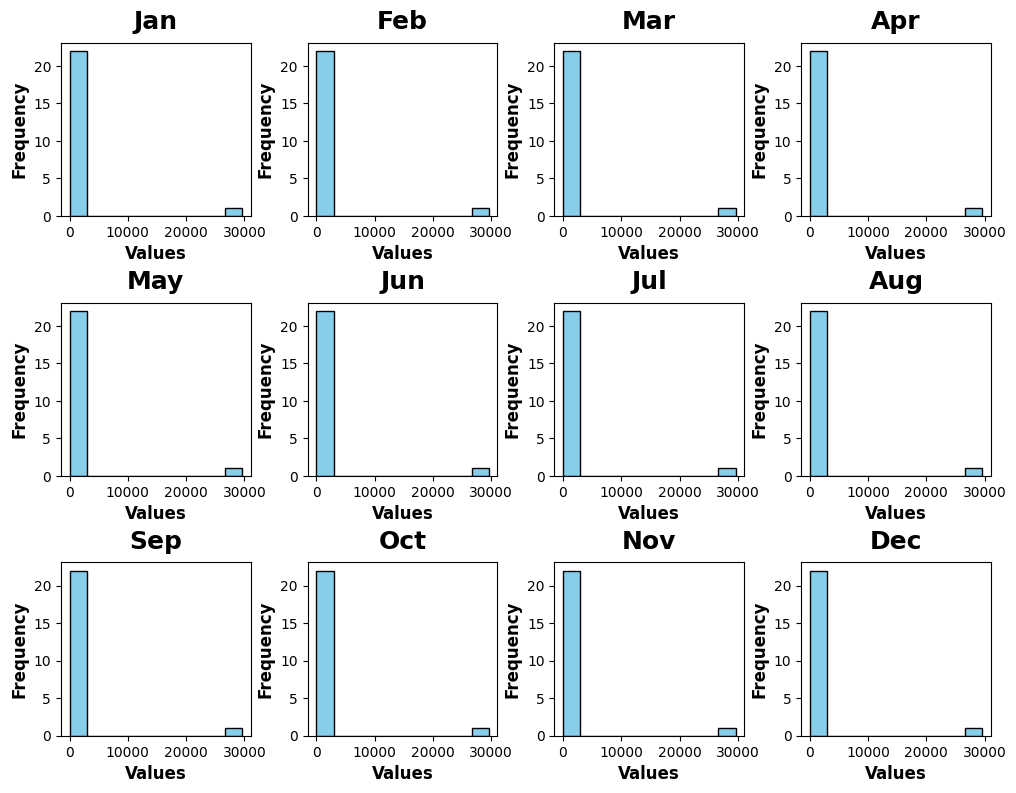

In [185]:
# Creating a 3x4 grid of subplots to plot histograms for 12 month data

mtdt = df_jaff_pvt[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

# Flatten the 2D axes array to 1D for easy iteration
axes = axes.ravel()

# Plot each histogram in a separate  plot
for i, col in enumerate(mtdt.columns):
    axes[i].hist(mtdt[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Show the plot
plt.show()

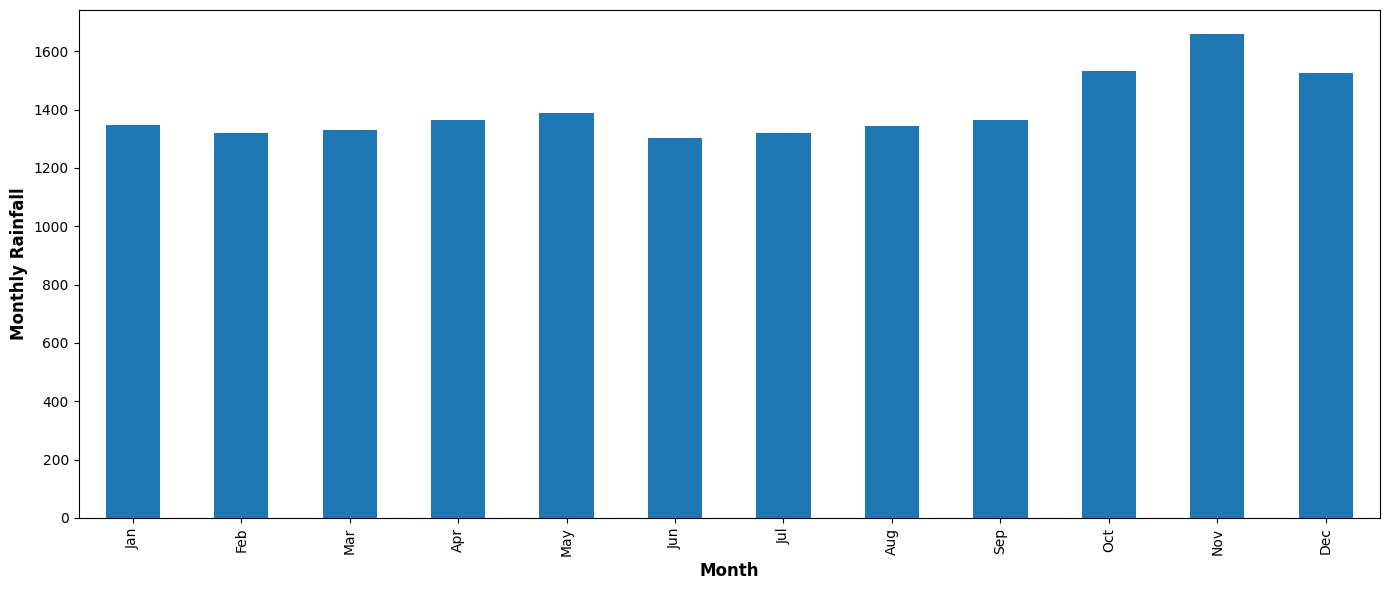

In [186]:
# Creating  bar plot of the average (mean) monthly rainfall for 12 months

mx = df_jaff_pvt[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean().plot.bar(figsize=(14,6))
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.show()

In [187]:
# Array x will be scaled to values between 0 and 1, preserving the relative relationships between the data points

minmax = preprocessing.MinMaxScaler(feature_range = (0,1))
minmax.fit(mth).transform(mth)

array([[0.00000000e+00, 2.36451871e-05, 3.76296263e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.76913290e-05, 0.00000000e+00,
        0.00000000e+00, 3.47246462e-03, 1.08430072e-02, 2.70230709e-05],
       [3.65487035e-03, 9.08650761e-04, 4.45880671e-04, 1.18563724e-03,
        1.53018139e-03, 6.08019096e-05, 1.45249006e-04, 2.12468895e-03,
        3.83727607e-03, 1.28190693e-02, 8.62035963e-03, 0.00000000e+00],
       [5.13438348e-04, 1.45249006e-04, 6.17139383e-03, 1.01336516e-05,
        3.37788387e-05, 2.70230709e-05, 1.68894193e-05, 9.25540180e-04,
        5.29989979e-03, 8.49875581e-03, 8.96490379e-03, 2.20238028e-03],
       [6.31664283e-03, 0.00000000e+00, 3.16169930e-03, 0.00000000e+00,
        1.26332857e-03, 1.35115355e-04, 1.01336516e-05, 1.94228322e-03,
        2.06050916e-03, 1.27751568e-02, 4.06359429e-03, 0.00000000e+00],
       [5.06682580e-04, 2.36451871e-04, 1.35790932e-03, 1.38493239e-04,
        9.15406528e-04, 0.00000000e+00, 0.00000000e+00, 3.50

# For Model evaluation data split required as Training and Testing set.

In [188]:
# Splitting the dataset into train and test dataset 

x_train,x_test,y_train,y_test = train_test_split(mth,tar,test_size = 0.3,random_state=42)

In [189]:
# Decision Tree Classification

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [190]:
# Predicting on x_test

y_pred = dtc_clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0])

In [191]:
# Priting the accuracy of the model

acc1 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", acc1)

Accuracy: 0.5714285714285714


In [192]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using Decision Tree

pd.DataFrame({'Actual':y_test,'Prediction':y_pred})

,Actual,Prediction
15,0,0
9,1,0
0,0,1
8,0,0
17,0,1
12,0,0
1,0,0


In [193]:
# Random Forest Classification

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [194]:
# Predicting on x_test

y_pred2= clf.predict(x_test)
y_pred2

array([0, 0, 1, 0, 0, 0, 0])

In [195]:
# Calculating the accuracy of the model

acc2 = metrics.accuracy_score(y_test,y_pred2)
print("Accuracy of Random Forest:", acc2)

Accuracy of Random Forest: 0.7142857142857143


In [196]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using Random Forest

pd.DataFrame({'Actual':y_test,'Prediction':y_pred2})

,Actual,Prediction
15,0,0
9,1,0
0,0,1
8,0,0
17,0,0
12,0,0
1,0,0


In [197]:
# Defining the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [None, 20, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Creating the RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)

# Fitting the RandomizedSearchCV to the data
random_search.fit(x_train, y_train)

# Getting the best hyperparameters and best model from RandomizedSearchCV
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_
 

D:\Projects\Geopatial\venv\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [198]:
# Predicting on x_test

y_pred3= best_model_random.predict(x_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0])

In [199]:
# calculating the accuracy of the model

acc3 = metrics.accuracy_score(y_test,y_pred3)
print("Accuracy of RandomizedSearchCV on Random Forest:", acc3)

Accuracy of RandomizedSearchCV on Random Forest: 0.8571428571428571


In [200]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using RandomizedSearchCV

pd.DataFrame({'Actual':y_test,'Prediction':y_pred3})

,Actual,Prediction
15,0,0
9,1,0
0,0,0
8,0,0
17,0,0
12,0,0
1,0,0


In [201]:
# Defining the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fitting the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters and best model from GridSearchCV
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

D:\Projects\Geopatial\venv\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [202]:
# Predicting on x_test

y_pred4= best_model_grid.predict(x_test)
y_pred4

array([0, 0, 0, 0, 0, 0, 0])

In [203]:
# Priting the accuracy of the model

acc4 = metrics.accuracy_score(y_test,y_pred4)
print("Accuracy of GridSearchCV on Random Forest:", acc4)

Accuracy of GridSearchCV on Random Forest: 0.8571428571428571


In [204]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using GridSearchCV

pd.DataFrame({'Actual':y_test,'Prediction':y_pred4})

,Actual,Prediction
15,0,0
9,1,0
0,0,0
8,0,0
17,0,0
12,0,0
1,0,0


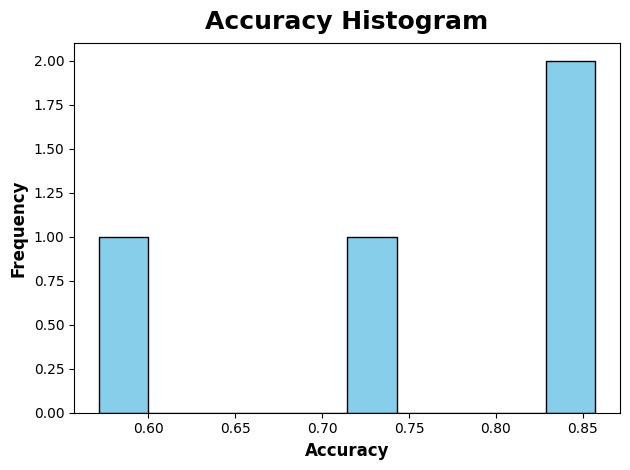

In [205]:
# Generating histogram for every accuracy of each of models

acc_scores = [acc1, acc2, acc3, acc4]

# Creating a histogram for accuracy scores
plt.hist(acc_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Histogram')
plt.show()

In [209]:
# if len(best_model_grid.classes_) == 2:  # Binary classification
#     y_probs = best_model_grid.predict_proba(x_test)[:, 1]
# else:  # Multi-class classification
#     y_probs = best_model_grid.predict_proba(x_test)

 
# # Calculate the AUC-ROC score
# if len(best_model_grid.classes_) == 2:  # Binary classification
#     auc_roc = roc_auc_score(y_test, y_probs)
# else:  # Multi-class classification
#     auc_roc = roc_auc_score(y_test, y_probs, multi_class='ovr')



# # Getting the false positive rate, true positive rate, and threshold values for plotting the curve
# fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# # Plotting the AUC-ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.2f}')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

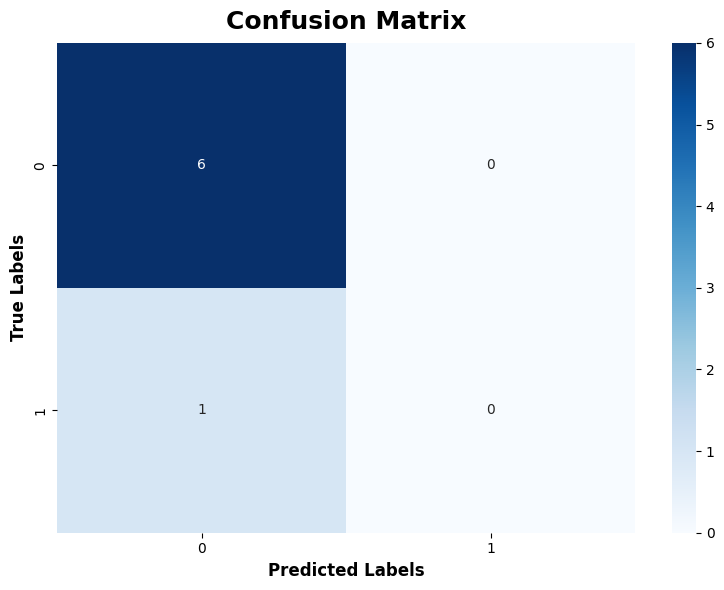

In [211]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred4)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()